<a href="https://colab.research.google.com/github/MessiSkillz/HousingPrices/blob/main/HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
data = pd.read_csv("California_Houses.csv")
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [5]:
print("Duplicates: " + str(data.duplicated().sum()))
print(data.isnull().sum())

Duplicates: 0
Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


<Axes: >

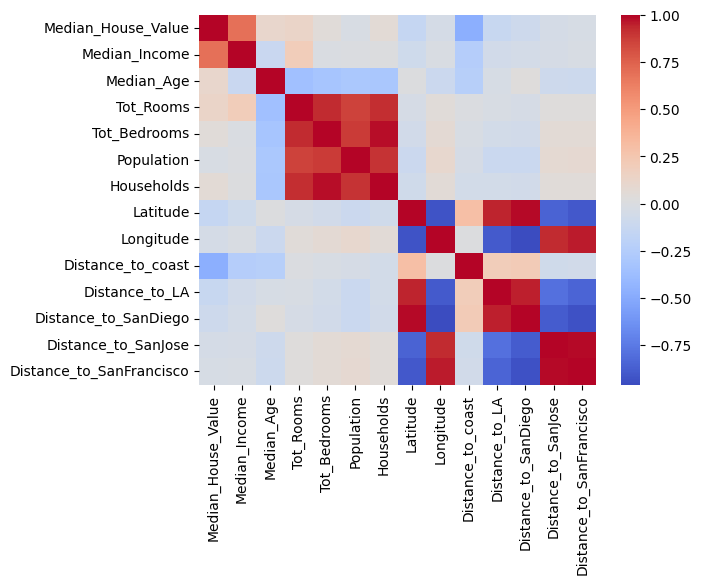

In [6]:
import seaborn as sns
sns.heatmap(data.corr(), cmap='coolwarm')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [24]:
y = data["Tot_Rooms"]
X = data.drop("Tot_Rooms", axis=1)
X.head()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = metrics.mean_squared_error(y_test, y_pred)**0.5
r2_score = metrics.r2_score(y_test, y_pred)
print("RMSE: " + str(rmse))
print("R2 Score: " + str(round(r2_score*100, 2)) + "%")

RMSE: 633.4185725517958
R2 Score: 91.78%


In [26]:
y_pred_train = model.predict(X_train)
rmse = metrics.mean_squared_error(y_train, y_pred_train)**0.5
r2_score = metrics.r2_score(y_train, y_pred_train)
print("RMSE: " + str(rmse))
print("R2 Score: " + str(round(r2_score*100, 2)) + "%")

RMSE: 598.8900225782277
R2 Score: 92.42%
